 
# IMDB Movie Deep Dive : A night at the movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this analysis, the objective is look at the TMDB movie dataset taken from Kaggle  to het an understanding of what influences movie grossing by looking at movie ratings, movie budgets and so on.  

#### Problem Statement

> A lot of questions may be posed to help : 
    - Does the budget, run time, genres or production companies impact the ratings?
    - What kinds of properties are associated with movies that have high revenues?
    - Which are the popular genres? 
    - What kinds of properties are associated with movies that have high revenues?  
 
#### Potential Outcome 

> Based on the set of questions and deep dive into the data, various recommendations may be drawn and help stakeholders such producers, production houses as well as actors make better decisions when coming up with movie budgets, casts and also better rated movies. If the primary objective of movie production is profitbality, this analysis of movies may help to explain which factors drive it and help struggling production companies to be more competitive.

 Below is the code to import the packages to make use of for the movie data deep dive.

In [159]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> After loading all the packages that will be used for the analysis, the next step would to load to the movie data set itself.

In [160]:
df = pd.read_csv('tmdb-movies.csv')

> Below are the first three rows of the movie dataset so that we have a look at what the looks like and to ensure that correct data was loaded. 

In [161]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


> The next part is to get an idea of the columns in the dataset as well as the data types associated.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### General Properties

>The original data set has 21 variables and their data types are mentioned in brackets. They are as follows:
    - id (int64) : The unique identifier of the movie
    - imdb_id (object) : The unique identifier of the movie on IMDB
    - Popularity (float64) : Popularity of the movie
    - Budget (int64) : The cost associated with the production of the movie
    - Revenue (int64) : The amount generated and earned by the movie
    - Original_title (object) : The name or title of a movie
    - Cast (object) : The actors that were in a movie
    - Homepage (object) : url or link to the movie in question
    - Director (object) : Individual/s who oversaw the production of the movie
    - Tagline (object) : A catch phrase associated with the movie
    - Keywords (object) : Words associated or that best describe the movie
    - Overview (object) : Brief description of a movie
    - Runtime (int64) : Duration of a movie
    - Genres (object) : Genre of a movie such as comedy, action, etc 
    - Production_companies (object) : Names of the companies producing the movie 
    - Release_date (object) : Release date of the movie
    - Vote_count(int64) : Number of votes received by the movie
    - Vote_average (float64) : Average vote received for the movie in IMDB 
    - Release_year (int64) :  Release year of the movie
    - Budget_adj (int64) : The adjusted cost associated with the production of the movie relative to 2010 figures
    - Revenue_adj (int64) : The adjusted amount generated and earned by the movie relative to 2010 figures

_Note: Original data set from Kaggle provides no information about unit of budget and revenue. I have assumed it to be in US dollars_

### Data Cleaning

The first step, would be to get the size of the data set, this is an ideal starting point. 

In [163]:
df.shape

(10866, 21)

Our dataset has 10866 rows and 21 columns.Next step would be to find out the composition of the dataset.

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There are some issues in regards to the data type that may need to be fixed. The release_date is currently an object instead of a timestamp. In order to rectify this, the release date has to be converted to a timestamp. The budget and revenue data is also set as integer and have changed it to float so that it matches the adjusted budget and adjusted revenue. Some of the budget and revenue amounts as well as runtime are equal to zero so we will drop all the rows and columns that have values less or equal to zero.

In [165]:
df.release_date = pd.to_datetime(df['release_date'])  
df.budget = pd.to_numeric(df.budget, downcast='float')
df.revenue = pd.to_numeric(df.revenue, downcast='float')
df= df[df['budget'] >0]
df= df[df['revenue'] >0]
df= df[df['runtime'] >0] 

Not all of the columns will be used for the analysis so I will drop some of the columns which I am not really interested in looking at.

In [166]:
df.shape

(3855, 21)

In [167]:
df.drop(['homepage','cast','overview','tagline','keywords','id','imdb_id','genres'], axis=1, inplace=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 13 columns):
popularity              3855 non-null float64
budget                  3855 non-null float32
revenue                 3855 non-null float32
original_title          3855 non-null object
director                3854 non-null object
runtime                 3855 non-null int64
production_companies    3809 non-null object
release_date            3855 non-null datetime64[ns]
vote_count              3855 non-null int64
vote_average            3855 non-null float64
release_year            3855 non-null int64
budget_adj              3855 non-null float64
revenue_adj             3855 non-null float64
dtypes: datetime64[ns](1), float32(2), float64(4), int64(3), object(3)
memory usage: 391.5+ KB


Check which variables with missing values, if so , true boolean value will be return.

In [169]:
df.isnull().any()

popularity              False
budget                  False
revenue                 False
original_title          False
director                 True
runtime                 False
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

The next thing to look at based on the composition of the dataset is missing values. All the numeric value variables seem to have no missing data. However, there are some missing string data, mainly _production companies_ and _director_. The next step would be to drop rows with missing production companies and directors.

In [170]:
df=df.dropna(subset=['production_companies', 'director'])

Next is to check if there are no null values.

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 13 columns):
popularity              3808 non-null float64
budget                  3808 non-null float32
revenue                 3808 non-null float32
original_title          3808 non-null object
director                3808 non-null object
runtime                 3808 non-null int64
production_companies    3808 non-null object
release_date            3808 non-null datetime64[ns]
vote_count              3808 non-null int64
vote_average            3808 non-null float64
release_year            3808 non-null int64
budget_adj              3808 non-null float64
revenue_adj             3808 non-null float64
dtypes: datetime64[ns](1), float32(2), float64(4), int64(3), object(3)
memory usage: 386.8+ KB


In [172]:
df.isnull().any()

popularity              False
budget                  False
revenue                 False
original_title          False
director                False
runtime                 False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

There are no null values in the dataset. The next thing is to look for duplicates.

In [173]:
sum(df.duplicated())

1

> There seems to be one duplicate, we will use the code below to remove the duplicate row.

In [174]:
 df.drop_duplicates(inplace = True)

> To check if the row has been dropped.

In [175]:
df.shape

(3807, 13)

The dataset is clean and ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis

Firstly, we look look at summary statistics and correlcation to get an idea of what is in the dataset.



### Summary Statistics

In [176]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3807.000000,3807.0,3.807000e+03,3807.000000,3807.000000,3807.000000,3807.000000,3.807000e+03,3.807000e+03
mean,1.203220,37589032.0,1.089162e+08,109.350932,533.886787,6.170239,2001.230890,4.469723e+07,1.386431e+08
std,1.480385,42318776.0,1.772686e+08,19.845761,883.605159,0.792423,11.327031,4.488596e+07,2.169636e+08
min,0.010335,1.0,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470439,10000000.0,1.425795e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.919970e+07
50%,0.809646,25000000.0,4.620143e+07,106.000000,208.000000,6.200000,2004.000000,3.038360e+07,6.282247e+07
75%,1.386953,50000000.0,1.260554e+08,119.000000,584.000000,6.700000,2010.000000,6.082825e+07,1.656493e+08
max,32.985763,425000000.0,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


> Below is a correlation matrix between the various variables. These figures will be used throughout the summaries especially the means going forward as well as the summary statistics above. 

### Correlation Matrix

In [177]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.443806,0.613881,0.213587,0.779170,0.320115,0.175845,0.395545,0.544871
budget,0.443806,1.000000,0.687134,0.259433,0.554795,0.023296,0.271720,0.958251,0.531068
revenue,0.613881,0.687134,1.000000,0.249093,0.753620,0.228225,0.141204,0.655958,0.900470
runtime,0.213587,0.259433,0.249093,1.000000,0.273369,0.358695,-0.113340,0.333271,0.279634
vote_count,0.779170,0.554795,0.753620,0.273369,1.000000,0.389965,0.209572,0.495340,0.653270
vote_average,0.320115,0.023296,0.228225,0.358695,0.389965,1.000000,-0.135793,0.036186,0.268396
release_year,0.175845,0.271720,0.141204,-0.113340,0.209572,-0.135793,1.000000,0.078206,-0.102013
budget_adj,0.395545,0.958251,0.655958,0.333271,0.495340,0.036186,0.078206,1.000000,0.568106
revenue_adj,0.544871,0.531068,0.900470,0.279634,0.653270,0.268396,-0.102013,0.568106,1.000000


### Insights

> The chart given below shows that the runtime lies between 90 and 120 minutes for majority of the movies. The mean value for all the movies comes close to 109 minutes.



Text(0,0.5,'Count')

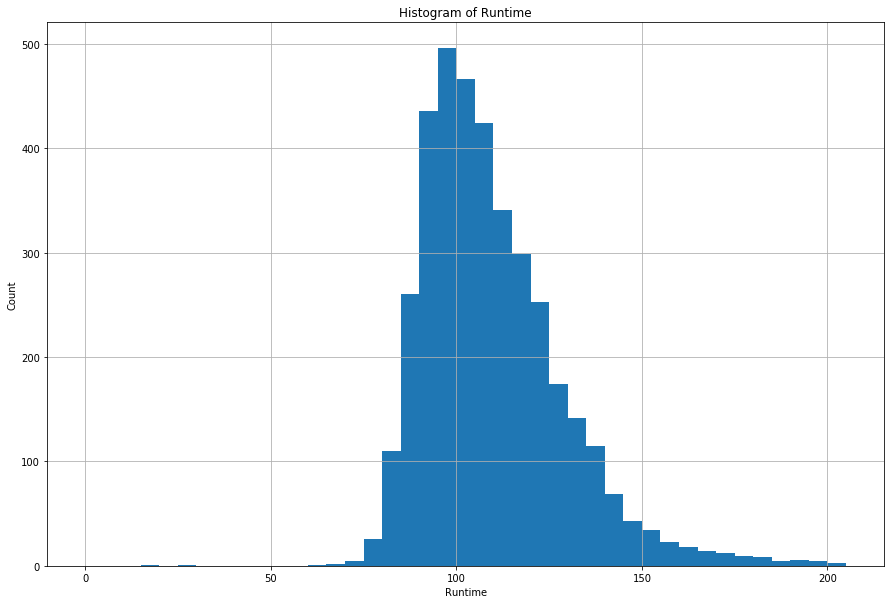

In [178]:
bin_values = np.arange(start=0, stop=210, step=5)
df.runtime.hist(bins=bin_values, figsize=[15,10])
# Add title and axis names
plt.title('Histogram of Runtime')
plt.xlabel('Runtime')
plt.ylabel('Count')

> Now let's consider the ratings -- we can see that the most popular ratings are between 5,5 and 7,5. Average rating stands at 6,2.

Text(0,0.5,'Count')

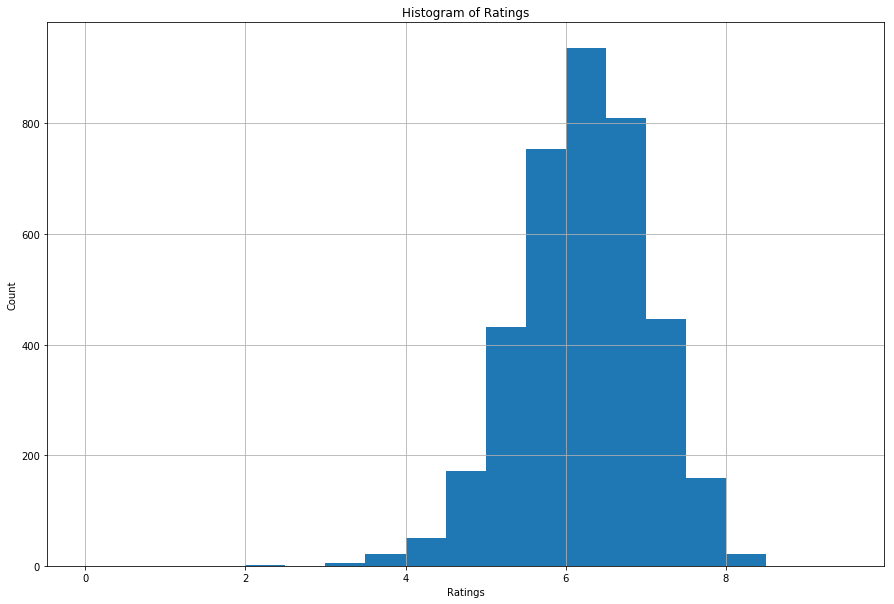

In [179]:
bin_values = np.arange(start=0, stop=10, step=0.5)
df.vote_average.hist(bins=bin_values, figsize=[15,10])
# Add title and axis names
plt.title('Histogram of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')

> Coming to the number of votes, we can see that majority of the movies received less than 300 votes.

Text(0,0.5,'Count')

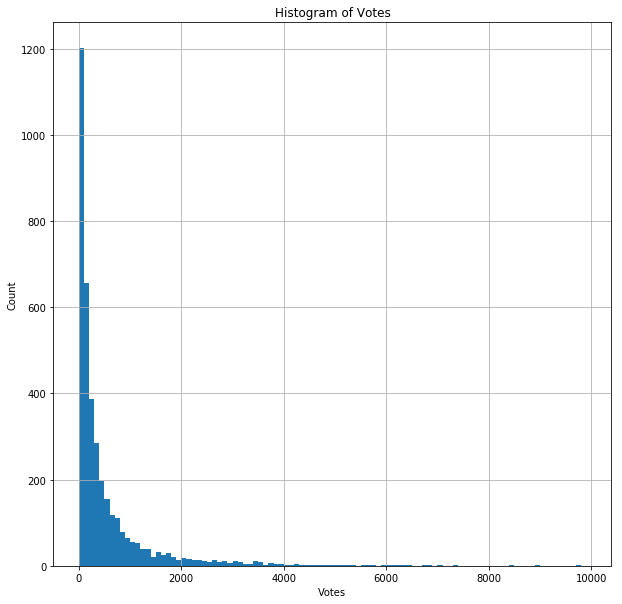

In [180]:
bin_values = np.arange(start=0, stop=10000, step=100)
df.vote_count.hist(bins=bin_values, figsize=[10,10])
# Add title and axis names
plt.title('Histogram of Votes')
plt.xlabel('Votes')
plt.ylabel('Count')

The histogram shows that the gross revenue is less than 50 million for majority of the movies. Average revenue for the 1000 movies comes close to 110 million.

Text(0,0.5,'Count')

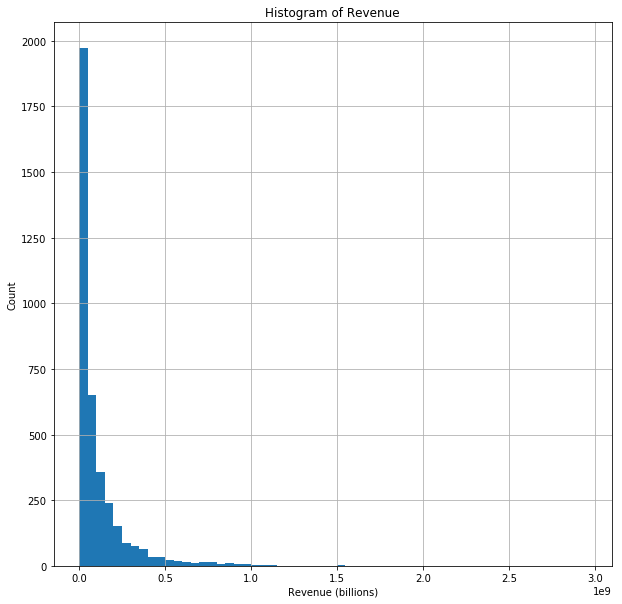

In [181]:
bin_values = np.arange(start=0, stop=3000000000, step=50000000)
df.revenue.hist(bins=bin_values, figsize=[10,10])
# Add title and axis names
plt.title('Histogram of Revenue')
plt.xlabel('Revenue (billions)')
plt.ylabel('Count')

> Let's now explore how the mean rating has changed over the years. Seems over the years, there has been a drop in the ratings though from 2011 there has been an upward trend till 2015.

Text(0,0.5,'Average Ratings')

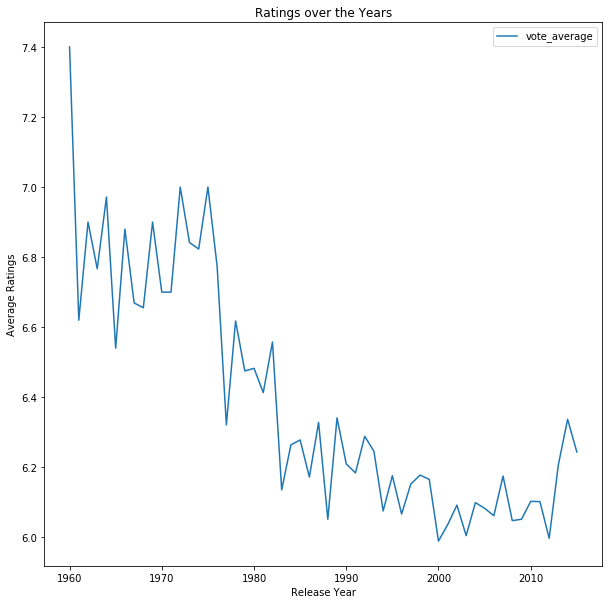

In [182]:
release_year_vote = df.iloc[:, [9,10]]
release_year_vote.groupby('release_year').mean().plot(kind='line', figsize=(10,10)) 
# Add title and axis names
plt.title('Ratings over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Ratings')

> Looking at the vote count over the years, shows an sharp increase in votes. 

Text(0,0.5,'Vote Count')

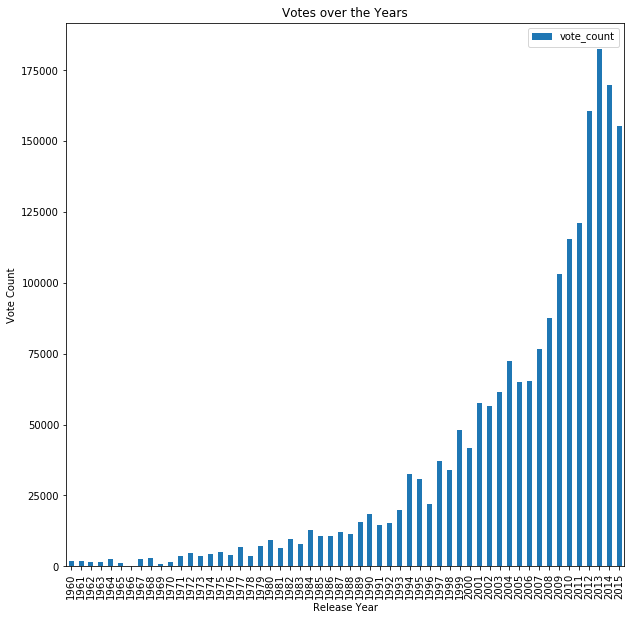

In [183]:
release_year_vote_count = df.iloc[:, [8,10]]
release_year_vote_count.groupby('release_year').sum().plot(kind='bar', figsize=(10,10)) 
# Add title and axis names
plt.title('Votes over the Years')
plt.xlabel('Release Year')
plt.ylabel('Vote Count')

> Moving the genres, we split the genre column and count the movies which would fall into different genres.

In [184]:
# Explode/Split column into multiple rows
genre_df = pd.read_csv('tmdb-movies.csv')
genre_df.genres = genre_df.genres.astype(str)
genre_df.genres = genre_df.genres.astype(str)
genre_df = pd.DataFrame(genre_df.genres.str.split('|').tolist(), index=genre_df.vote_average).stack() 
genre_df = genre_df.reset_index([0, 'vote_average']) 
genre_df.columns = ['vote_average', 'genres']
genre_df= genre_df[genre_df['genres'] !='nan'] 
genre_df.head(5)

,vote_average,genres
0,6.5,Action
1,6.5,Adventure
2,6.5,Science Fiction
3,6.5,Thriller
4,7.1,Action


Let us have a look at the movies that were produced and in which category they fall under.

Text(0,0.5,'Count')

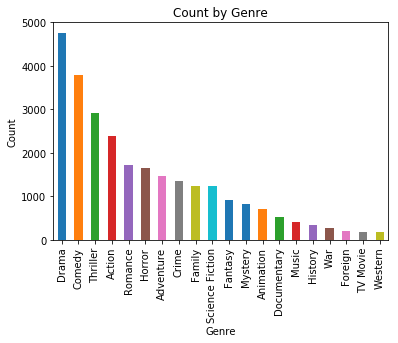

In [185]:
gen_count = genre_df['genres'].value_counts()
gen_count.plot(kind = 'bar')
# Add title and axis names
plt.title('Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

> The pie chart below show the proportion of each genre based on the top 10 genres, with drama making up close to a quarter of the top 10 genre movies.

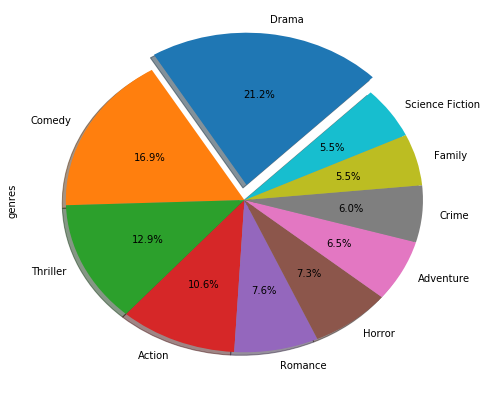

In [186]:
# plot the most frequent genres
gen_count[:10].plot(
                    kind = 'pie', figsize=(8,7) , shadow = True,
                    explode =(0.1,0,0,0,0,0,0,0,0,0), 
                    autopct = '%1.1f%%' , startangle = 45
                   )

> The bar chart below shows that following are the top five most used genres - Documentary, music, unclassified, history and animation. Despite unclassified genre movies having a high rating, there a very few movies that are unclassified in regards to the genre.

Text(0,0.5,'Average Ratings')

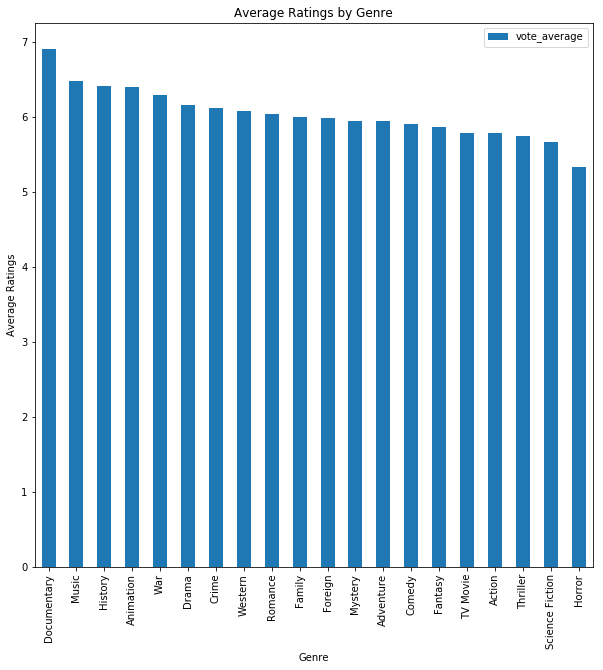

In [187]:
(genre_df.groupby('genres').mean()).sort_values(by=['vote_average'], ascending=False).plot(kind='bar', figsize=(10,10)) 
# Add title and axis names
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Ratings')

> The scatter plot of rating and revenue will help us understand if movies with better rating, generate higher revenue. We can see that, although the correlation coefficient is positive and the relationship is very weak as depicted by a value of 0.17 in the correlation matrix table.

Text(0,0.5,'Revenue')

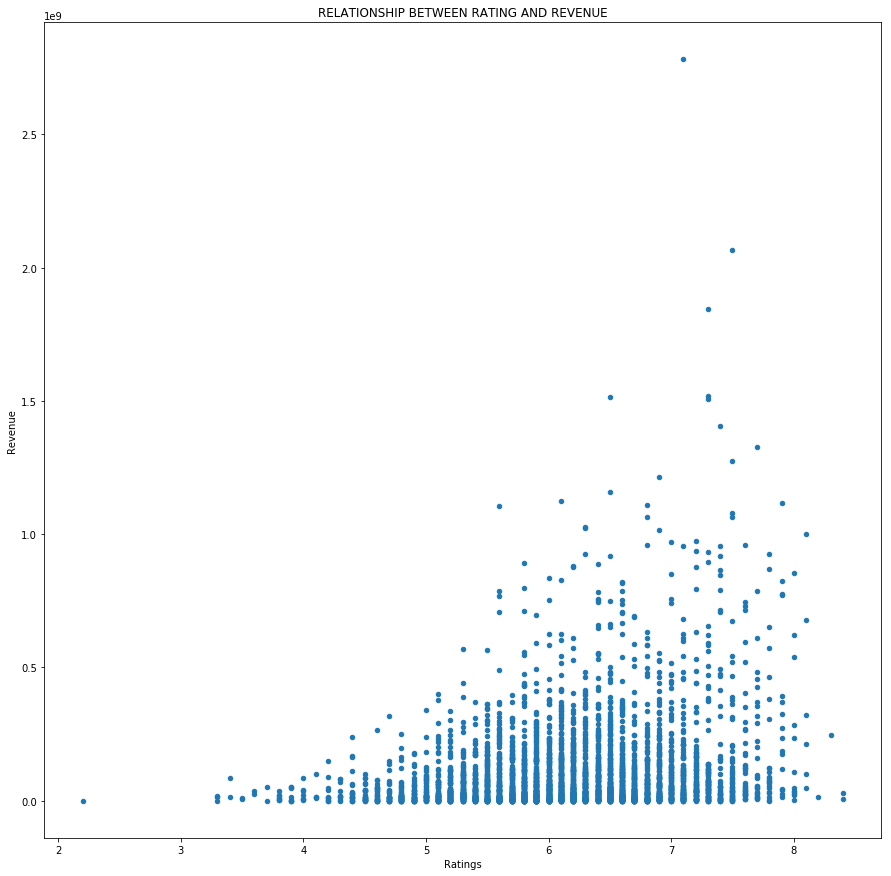

In [188]:
df.plot(x='vote_average',y='revenue',kind ='scatter',figsize=(15,15))
# Add title and axis names
plt.title('RELATIONSHIP BETWEEN RATING AND REVENUE')
plt.xlabel('Ratings')
plt.ylabel('Revenue')


This scatter plot shows the relationship between rating and number of votes. We can infer that there is weak positive correlation, which means movies with higher rating, to a certain extent attract more number of votes but not always.

Text(0,0.5,'Votes')

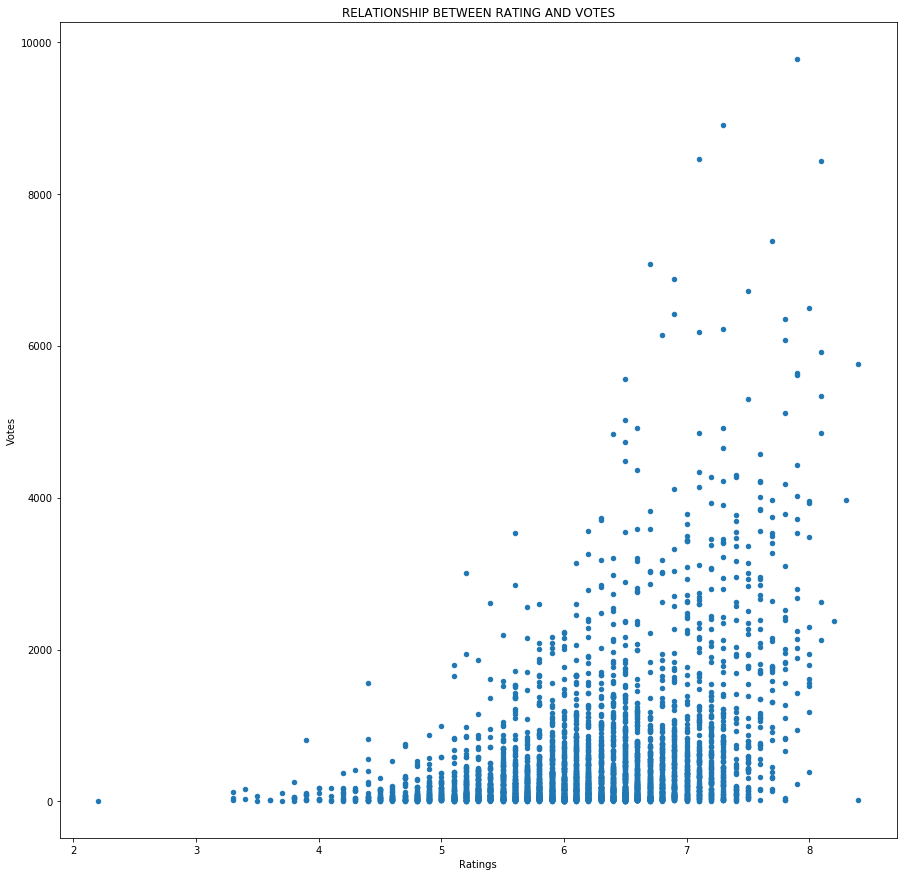

In [189]:
df.plot(x='vote_average',y='vote_count',kind ='scatter',figsize=(15,15))
# Add title and axis names
plt.title('RELATIONSHIP BETWEEN RATING AND VOTES')
plt.xlabel('Ratings')
plt.ylabel('Votes')


<a id='conclusions'></a>
## Conclusions

> Firstly, this analysis is based on a sample of the IMDB movie dataset which originally had 10866 rows and 21 columns. Due to missing data and imbalanced data some of the rows and columns were dropped during the data wrangling and cleaning process leaving us with 3807 rows which represents a sample of the actual dataset and this then may affect data accuracy as well as the statistics and interpretation of the data. Caution must be taken when dropping conclusions as there might be biases based on the sampling, missing data and imbalanced data. The use of sampling helps us at least have a picture of what's happening but is not entirely conclusive and is not a true representation of population. 

>  Analysis of the movie dataset shows that majority of the movies have runtime between 90 and 120 minutes. We also saw that ratings lie between 6 and 7 with mean value of 6,2.
 While majority of the movies have received less than 300 votes, the gross revenue is less than 50 million dollars for close to half of the movies with the most grossing movie bringing in just under 3 billion dollars averaging to about 110 million per movie. 
 
> Over the decades, there has been a decline in ratings though more people are voting which could be a sign of better quality votes, though from 2011 there has been an upward trend till 2015 and this may be affected by missing values. 
> The top genres are Documentary, Music, History, Animation and War based on the sample and this may not necessarily be the true representation since movies may fall into multiple categories as well as the data is based on a sample and not a true representation of the entire dataset. 
 
>We couldn't establish acceptable correlation between rating and revenue as  well as for rating and vote though there is some sort of dependency that does exist. Though there is correlation between caution should be taken as this merely represents a sample of the dataset in question and more has to be considered before making a conclusion.

In [190]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'DAND Project Movie Data Analysis.ipynb'])

0